In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
# Spotify credentials
client_id = 'f645b7ab739948649ccf368875be4672'
client_secret = '07fe34ca7e734cc68347dad0dda37f59'

# Set up Spotify authorization
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [36]:
def get_playlist_features(playlist_id):
    tracks_data = []
    offset = 0
    limit = 100

    while True:
        # Get the playlist tracks with pagination
        playlist_tracks = sp.playlist_tracks(playlist_id, offset=offset, limit=limit)
        
        for item in playlist_tracks['items']:
            track = item['track']
            track_id = track['id']
            
            # Get audio features for each track
            features = sp.audio_features(track_id)[0]
            
            # Store key details and features
            track_info = {
                'track_name': track['name'],
                'artist': track['artists'][0]['name'],
                'danceability': features['danceability'],
                'energy': features['energy'],
                'tempo': features['tempo'],
                'valence': features['valence'],
                'instrumentalness': features['instrumentalness'],
                'key': features['key'],
                'loudness': features['loudness']
            }
            tracks_data.append(track_info)
        
        # Check if there are more tracks to fetch
        if playlist_tracks['next']:
            offset += limit
        else:
            break
    
    return pd.DataFrame(tracks_data)

In [37]:
# Playlist IDs for Classical and Jazz
classical_playlist_id = '37i9dQZF1DWWEJlAGA9gs0'
jazz_playlist_id = '37i9dQZF1DXbITWG1ZJKYt'

# Fetch features for both playlists
print("Fetching Classical playlist features...")
classical_df = get_playlist_features(classical_playlist_id)

print("Fetching Jazz playlist features...")
jazz_df = get_playlist_features(jazz_playlist_id)

# Display the DataFrames
print("\nClassical Playlist Features:")
print(classical_df.head())

print("\nJazz Playlist Features:")
print(jazz_df.head())

df = pd.concat([classical_df, jazz_df])
df['genre'] = ['Classical'] * len(classical_df) + ['Jazz'] * len(jazz_df)

print("\nCombined DataFrame:")
print(df.head())

print("\nNumber of tracks in each genre:")
print(df['genre'].value_counts())


Fetching Classical playlist features...
Fetching Jazz playlist features...

Classical Playlist Features:
                                          track_name                 artist  \
0  The Well-Tempered Clavier, Book 1, BWV 846-869...  Johann Sebastian Bach   
1  Cello Suite No. 1 in G Major, BWV 1007: I. Pré...  Johann Sebastian Bach   
2    Bagatelle No. 25 in A Minor, WoO 59 "Für Elise"   Ludwig van Beethoven   
3  The Carnival of the Animals, R. 125: XIII. The...    Camille Saint-Saëns   
4          Suite No. 3 in D Major, BWV 1068: II. Air  Johann Sebastian Bach   

   danceability  energy    tempo  valence  instrumentalness  key  loudness  
0        0.2340  0.1260  133.998   0.2160             0.896    0   -25.427  
1        0.2750  0.1570   73.289   0.3040             0.842    7   -18.752  
2        0.2890  0.0306  125.610   0.1180             0.911    9   -30.790  
3        0.1690  0.0161  128.143   0.0573             0.860    9   -31.034  
4        0.0753  0.0700   79.801   

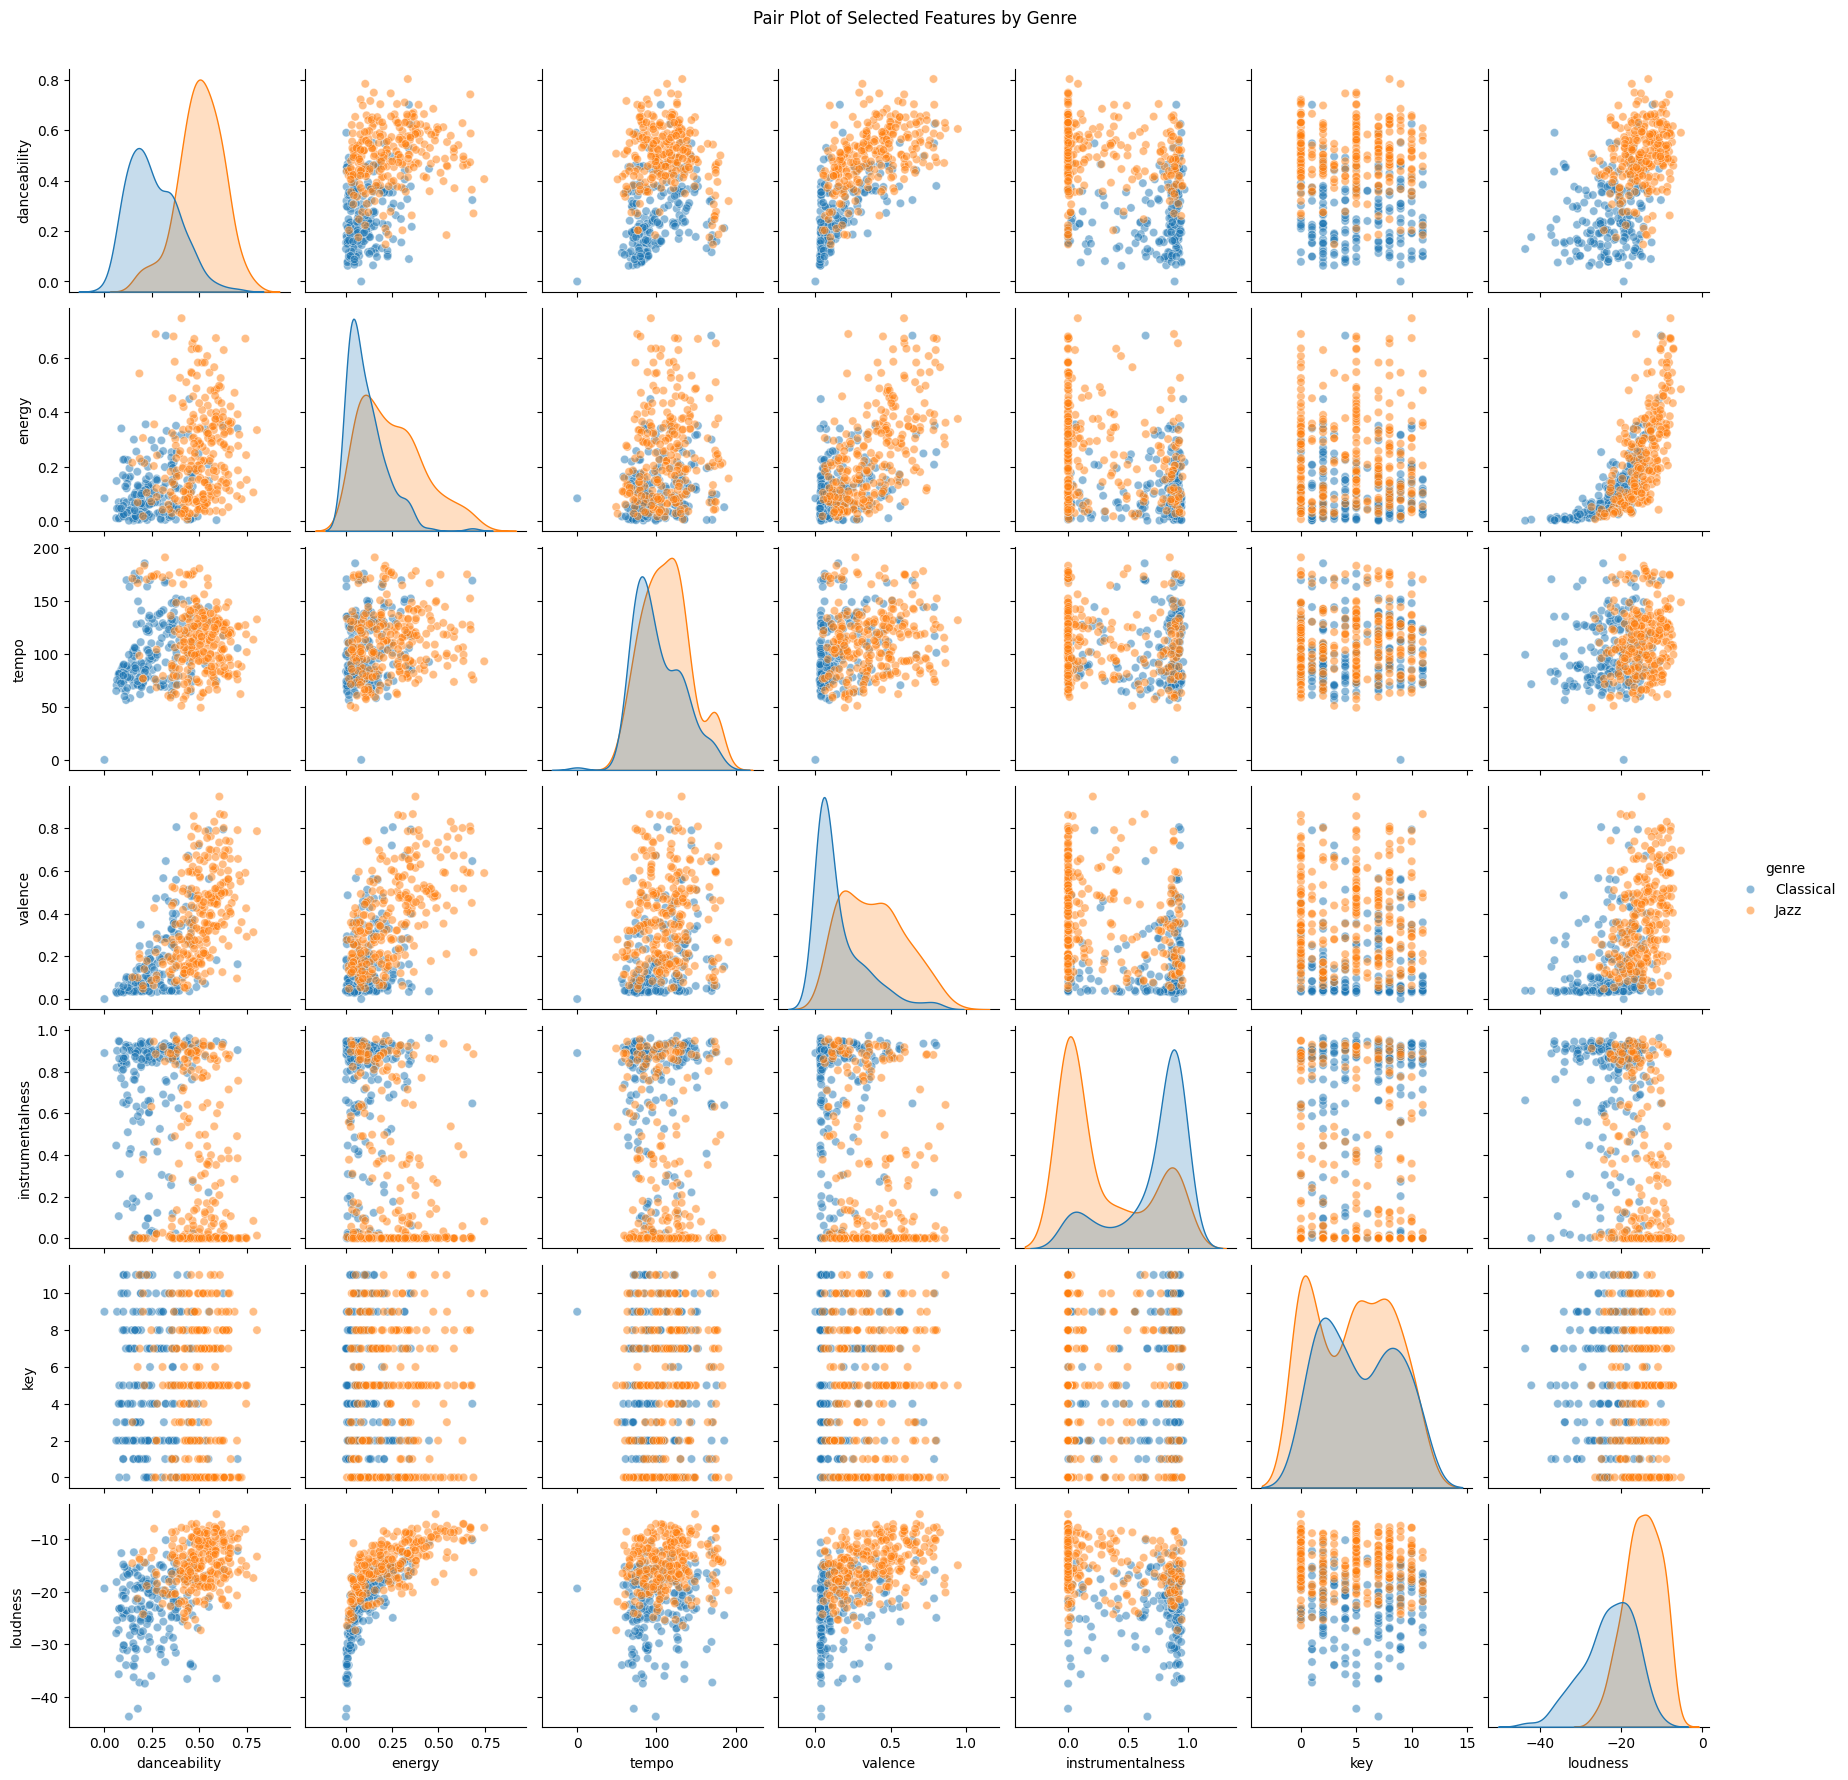

In [38]:
sns.pairplot(df, hue='genre', diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pair Plot of Selected Features by Genre", y=1.02)
plt.show()